17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'rnn_types' is not defined

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training SimpleRNN model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.5538 - loss: 0.6728 - val_accuracy: 0.7334 - val_loss: 0.5368
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7870 - loss: 0.4669 - val_accuracy: 0.7620 - val_loss: 0.5299
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8066 - loss: 0.4284 - val_accuracy: 0.7317 - val_loss: 0.5643
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8393 - loss: 0.3887 - val_accuracy: 0.7258 - val_loss: 0.5374
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8789 - loss: 0.3029 - val_accuracy: 0.7670 - val_loss: 0.5201
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7649 - loss: 0.5257
Test accuracy: 0.7670400142669678
Training LSTM model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.7229 - loss: 0.5295 - val_accuracy: 0.8425 - val_loss: 0.3537
Epoch 2/5
782/7

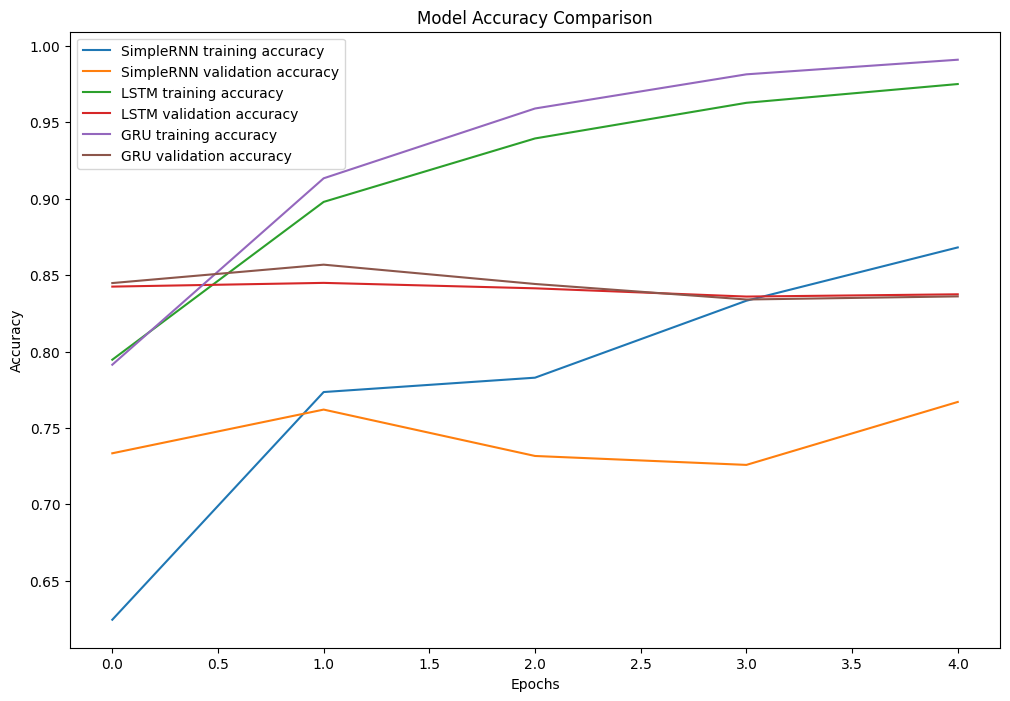

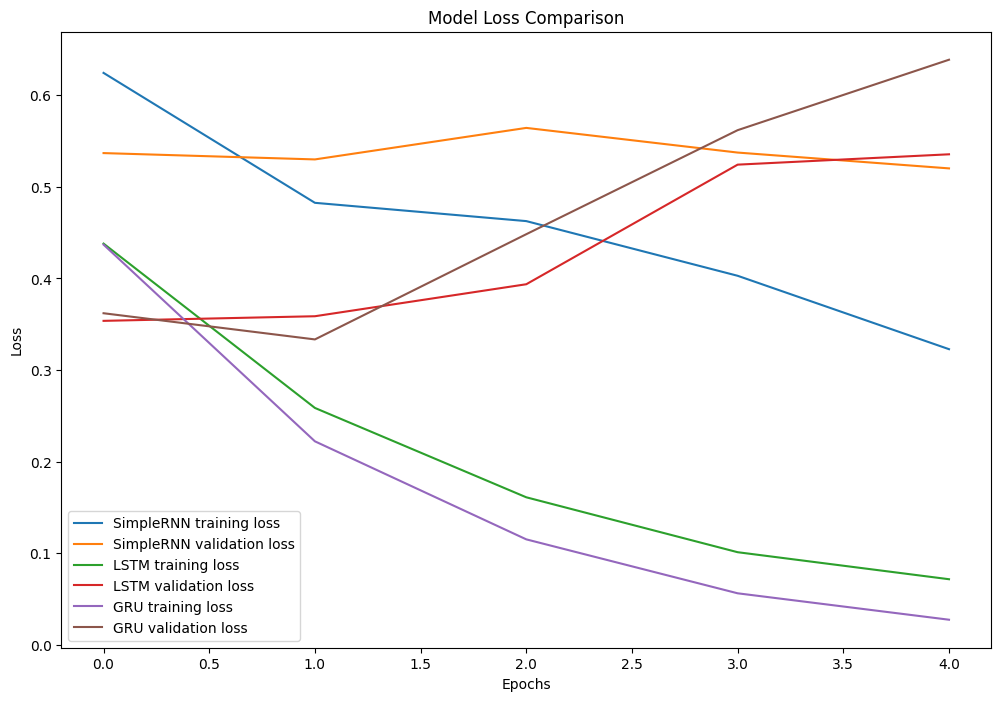

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

# Load the IMDB dataset
max_features = 20000  # Number of words to consider as features
maxlen = 100  # Cut texts after this number of words (max. length)
batch_size = 32

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Function to create model based on RNN type
def create_model(rnn_type, units=128):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    if rnn_type == 'SimpleRNN':
        model.add(SimpleRNN(units))
    elif rnn_type == 'LSTM':
        model.add(LSTM(units))
    elif rnn_type == 'GRU':
        model.add(GRU(units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train models and store their histories
rnn_types = ['SimpleRNN', 'LSTM', 'GRU']
histories = {}

for rnn_type in rnn_types:
    print(f"Training {rnn_type} model...")
    model = create_model(rnn_type)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    histories[rnn_type] = history
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc}")

# Visualization of results
def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(12, 8))
    for rnn_type in histories:
        plt.plot(histories[rnn_type].history[metric], label=f'{rnn_type} training {metric}')
        plt.plot(histories[rnn_type].history[f'val_{metric}'], label=f'{rnn_type} validation {metric}')
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epochs')
    plt.legend(loc='best')
    plt.show()

# Plot accuracy and loss
plot_history(histories, 'accuracy')
plot_history(histories, 'loss')

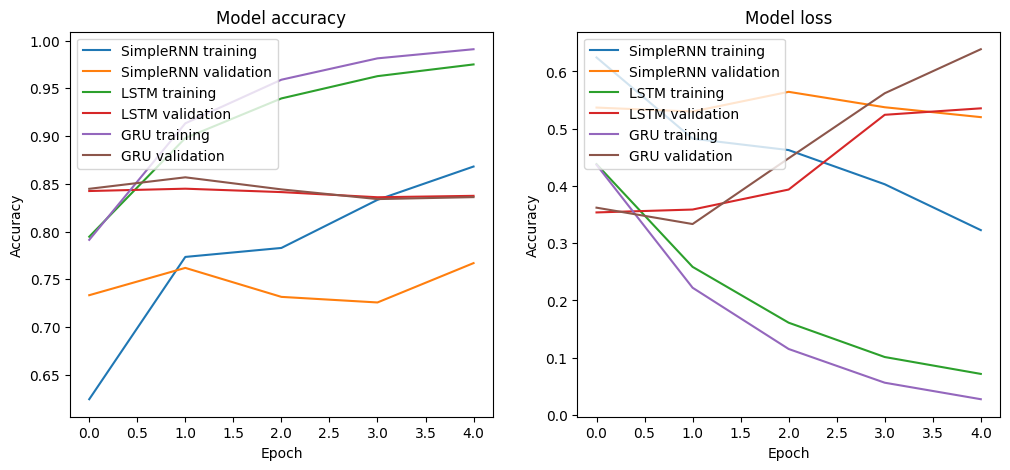

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
for rnn_type in histories:
  plt.subplot(1, 2, 1)
  plt.plot(histories[rnn_type].history['accuracy'], label=f'{rnn_type} training ')
  plt.plot(histories[rnn_type].history['val_accuracy'], label=f'{rnn_type} validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')



for rnn_type in histories:
  plt.subplot(1, 2, 2)
  plt.plot(histories[rnn_type].history['loss'], label=f'{rnn_type} training ')
  plt.plot(histories[rnn_type].history['val_loss'], label=f'{rnn_type} validation')
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
max_features = 20000  # Number of words to consider as features
maxlen = 100  # Cut texts after this number of words (max. length)
batch_size = 32

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Function to predict sentiment for a new review
def predict_review(review, model):
    # Preprocess the review
    word_index = imdb.get_word_index()
    words = text_to_word_sequence(review)
    sequence_data = [word_index[word] if word in word_index and word_index[word] < max_features else 0 for word in words]
    sequence_data = pad_sequences([sequence_data], maxlen=maxlen)  # Pad to maxlen

    # Make prediction
    prediction = model.predict(sequence_data)
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Review sentiment: {sentiment} (Confidence: {prediction[0][0]:.2f})")

# Simple RNN Model
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(max_features, 128))
simple_rnn_model.add(SimpleRNN(128))
simple_rnn_model.add(Dense(1, activation='sigmoid'))
simple_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train SimpleRNN model
simple_rnn_history = simple_rnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
simple_rnn_test_loss, simple_rnn_test_acc = simple_rnn_model.evaluate(x_test, y_test)
print(f"SimpleRNN Test accuracy: {simple_rnn_test_acc}")

# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 128))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
lstm_history = lstm_model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test)
print(f"LSTM Test accuracy: {lstm_test_acc}")

# GRU Model
gru_model = Sequential()
gru_model.add(Embedding(max_features, 128))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train GRU model
gru_history = gru_model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
gru_test_loss, gru_test_acc = gru_model.evaluate(x_test, y_test)
print(f"GRU Test accuracy: {gru_test_acc}")

# Store test accuracies
test_accuracies = {
    'SimpleRNN': simple_rnn_test_acc,
    'LSTM': lstm_test_acc,
    'GRU': gru_test_acc
}

# Function to plot history of each model
def plot_history(history, model_name, metric='accuracy'):
    plt.plot(history.history[metric], label=f'{model_name} training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'{model_name} validation {metric}')
    plt.title(f'{model_name} {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot accuracy and loss for each model
plot_history(simple_rnn_history, 'SimpleRNN', 'accuracy')
plot_history(simple_rnn_history, 'SimpleRNN', 'loss')
plot_history(lstm_history, 'LSTM', 'accuracy')
plot_history(lstm_history, 'LSTM', 'loss')
plot_history(gru_history, 'GRU', 'accuracy')
plot_history(gru_history, 'GRU', 'loss')

# Plot test accuracies for each model
def plot_test_accuracies(test_accuracies):
    plt.figure(figsize=(8, 6))
    plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['skyblue', 'salmon', 'lightgreen'])
    plt.title("Test Accuracy for Each Model")
    plt.ylabel("Accuracy")
    plt.xlabel("Model Type")
    plt.ylim(0, 1)
    plt.show()

plot_test_accuracies(test_accuracies)

# Example predictions using each model
sample_review = "This movie was fantastic with great acting and an engaging plot!"
print("\nSimpleRNN Model Prediction:")
predict_review(sample_review, simple_rnn_model)

print("\nLSTM Model Prediction:")
predict_review(sample_review, lstm_model)

print("\nGRU Model Prediction:")
predict_review(sample_review, gru_model)
